In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ramanspy as rp

Load spectral axis and obtain cropped version

In [2]:
with open('../raw datasets/High SNR/spectral_axis.pkl', 'rb') as f:
    spectral_axis = pickle.load(f)

In [3]:
spectral_axis_cropped = rp.preprocessing.misc.Cropper(region=(400, 1800)).apply(rp.Spectrum(np.arange(len(spectral_axis)), spectral_axis)).spectral_axis

### Plotting a single spectrum before and after preprocessing

The preprocessing pipeline used in the paper is:

In [4]:
preprocessor = rp.preprocessing.Pipeline([
    rp.preprocessing.misc.Cropper(region=(400, 1800)),
    rp.preprocessing.baseline.ASPLS(),
    rp.preprocessing.normalise.Vector(pixelwise=False),
])

Helper function to plot a spectrum

In [5]:
def plot_selected_spectrum(raw_spectrum, preprocessed_spectrum, spectral_axis, spectral_axis_preprocessed, title, save_path=None):
    fig, axs = plt.subplots(1, 2, figsize=(8, 2.75))

    axs[0].plot(spectral_axis, raw_spectrum)
    axs[1].plot(spectral_axis_preprocessed, preprocessed_spectrum)

    axs[0].set_title('Raw')
    axs[1].set_title('Preprocessed')

    axs[0].set_xlabel('Raman shift (cm$^{-1}$)')
    axs[1].set_xlabel('Raman shift (cm$^{-1}$)')
    axs[0].set_ylabel('Intensity (a.u.)')

    fig.suptitle(title)

    fig.tight_layout()

    if save_path is not None:
        fig.savefig(save_path, dpi=1200, bbox_inches='tight')

    plt.show()

Helper function to plot endmembers

In [6]:
def plot_endmembers(raw_endmembers, preprocessed_endmembers, spectral_axis, spectral_axis_preprocessed, title, save_path=None):
    colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(raw_endmembers)))

    fig, axs = plt.subplots(len(raw_endmembers), 2, figsize=(8, 2*len(raw_endmembers)), sharex='col')
    for i, (enmember_name, color, raw_endmember, preprocessed_endmember) in enumerate(zip(enmember_names, colors, raw_endmembers, preprocessed_endmembers)):
        axs[i, 0].plot(spectral_axis, raw_endmember, c=color)
        axs[i, 1].plot(spectral_axis_preprocessed, preprocessed_endmember, c=color)

        axs[i, 0].set_ylabel('Intensity (a.u.)')

        axs[i, 0].set_title(f'{enmember_name}')
        axs[i, 1].set_title(f'{enmember_name}')

    axs[len(raw_endmembers)-1, 0].set_xlabel('Raman shift (cm$^{-1}$)')
    axs[len(raw_endmembers)-1, 1].set_xlabel('Raman shift (cm$^{-1}$)')

    fig.suptitle(title)
    fig.tight_layout()

    if save_path is not None:
        fig.savefig(save_path, dpi=1200, bbox_inches='tight')

    plt.show()

### Plotting spectra from selected solution before and after preprocessing

In [7]:
hsnr_metadata = pd.read_csv('../raw datasets/High SNR/metadata.csv')
lsnr_metadata = pd.read_csv('../raw datasets/Low SNR/metadata.csv')

In [8]:
hsnr_metadata[(hsnr_metadata['Sucrose [ul]'] == 75) & (hsnr_metadata['Fructose [ul]'] == 75) & (hsnr_metadata['Maltose [ul]'] == 75) & (hsnr_metadata['Glucose [ul]'] == 75) & (hsnr_metadata['Water [ul]'] == 75)]

,Unnamed: 0,samp,row,col,plate,round,meas,rep,Sucrose [ul],Fructose [ul],Maltose [ul],Glucose [ul],Water [ul],Total Volume [ul]
29,Sugar_Concentration_Test_72_F12_1_RD2_M1_R2,72,F,12,1,2,1,2,75,75,75,75,75,375
119,Sugar_Concentration_Test_72_F12_1_RD1_M1_R4,72,F,12,1,1,1,4,75,75,75,75,75,375
727,Sugar_Concentration_Test_72_F12_1_RD1_M1_R2,72,F,12,1,1,1,2,75,75,75,75,75,375
1064,Sugar_Concentration_Test_72_F12_1_RD2_M1_R3,72,F,12,1,2,1,3,75,75,75,75,75,375
1162,Sugar_Concentration_Test_72_F12_1_RD2_M1_R1,72,F,12,1,2,1,1,75,75,75,75,75,375
1165,Sugar_Concentration_Test_72_F12_1_RD1_M1_R3,72,F,12,1,1,1,3,75,75,75,75,75,375
1658,Sugar_Concentration_Test_72_F12_1_RD1_M1_R1,72,F,12,1,1,1,1,75,75,75,75,75,375
1841,Sugar_Concentration_Test_72_F12_1_RD2_M1_R4,72,F,12,1,2,1,4,75,75,75,75,75,375


In [9]:
lsnr_metadata[(lsnr_metadata['Sucrose [ul]'] == 75) & (lsnr_metadata['Fructose [ul]'] == 75) & (lsnr_metadata['Maltose [ul]'] == 75) & (lsnr_metadata['Glucose [ul]'] == 75) & (lsnr_metadata['Water [ul]'] == 75)]

,Unnamed: 0,samp,row,col,plate,round,meas,rep,Sucrose [ul],Fructose [ul],Maltose [ul],Glucose [ul],Water [ul],Total Volume [ul]
204,Sugar_Concentration_Test_Fast_72_F12_1_RD2_M1_R1,72,F,12,1,2,1,1,75,75,75,75,75,375
745,Sugar_Concentration_Test_Fast_72_F12_1_RD8_M1_R4,72,F,12,1,8,1,4,75,75,75,75,75,375
783,Sugar_Concentration_Test_Fast_72_F12_1_RD6_M1_R4,72,F,12,1,6,1,4,75,75,75,75,75,375
847,Sugar_Concentration_Test_Fast_72_F12_1_RD2_M1_R4,72,F,12,1,2,1,4,75,75,75,75,75,375
900,Sugar_Concentration_Test_Fast_72_F12_1_RD7_M1_R3,72,F,12,1,7,1,3,75,75,75,75,75,375
938,Sugar_Concentration_Test_Fast_72_F12_1_RD4_M1_R4,72,F,12,1,4,1,4,75,75,75,75,75,375
977,Sugar_Concentration_Test_Fast_72_F12_1_RD6_M1_R1,72,F,12,1,6,1,1,75,75,75,75,75,375
1747,Sugar_Concentration_Test_Fast_72_F12_1_RD3_M1_R2,72,F,12,1,3,1,2,75,75,75,75,75,375
2115,Sugar_Concentration_Test_Fast_72_F12_1_RD2_M1_R3,72,F,12,1,2,1,3,75,75,75,75,75,375
2136,Sugar_Concentration_Test_Fast_72_F12_1_RD1_M1_R3,72,F,12,1,1,1,3,75,75,75,75,75,375


In [10]:
# Indices of spectra corresponding to the selected sample
hsnr_index = 29
lsnr_index = 4925

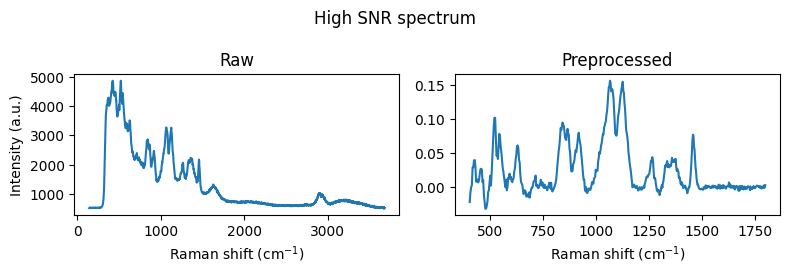

In [11]:
hsnr_data = pickle.load(open('../raw datasets/High SNR/data.pkl', 'rb'))

high_snr_spectrum = hsnr_data[hsnr_index]
high_snr_spectrum_preprocessed = preprocessor.apply(rp.Spectrum(high_snr_spectrum, spectral_axis)).spectral_data

plot_selected_spectrum(high_snr_spectrum, high_snr_spectrum_preprocessed, spectral_axis, spectral_axis_cropped, 'High SNR spectrum', save_path='high_snr_spectrum.png')

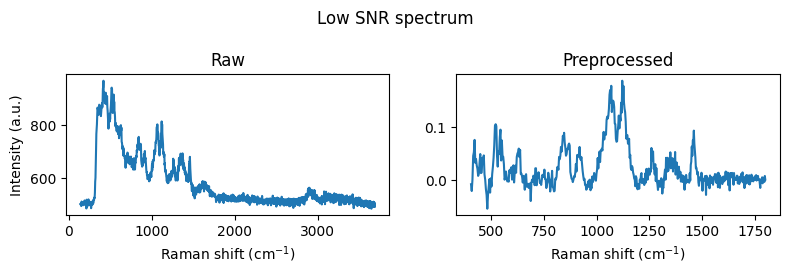

In [12]:
lsnr_data = pickle.load(open('../raw datasets/Low SNR/data.pkl', 'rb'))

low_snr_spectrum = lsnr_data[lsnr_index]
low_snr_spectrum_preprocessed = preprocessor.apply(rp.Spectrum(low_snr_spectrum, spectral_axis)).spectral_data

plot_selected_spectrum(low_snr_spectrum, low_snr_spectrum_preprocessed, spectral_axis, spectral_axis_cropped, 'Low SNR spectrum', save_path='low_snr_spectrum.png')

### Plotting endmembers before and after preprocessing

Loading endmembers

In [13]:
enmember_names = ['Sucrose', 'Fructose', 'Maltose', 'Glucose', 'Water']

In [15]:
# Loading raw GT endmembers
hsnr_gt_endmembers = np.load('../results/raw/High SNR/replicate_1/endmembers/gt.npy')
lsnr_gt_endmembers = np.load('../results/raw/Low SNR/replicate_1/endmembers/gt.npy')

# Loading preprocessed GT endmembers
hsnr_gt_endmembers_preprocessing = np.load('../results/preprocessing_customised/High SNR/replicate_1/endmembers/gt.npy')
lsnr_gt_endmembers_preprocessing = np.load('../results/preprocessing_customised/Low SNR/replicate_1/endmembers/gt.npy')

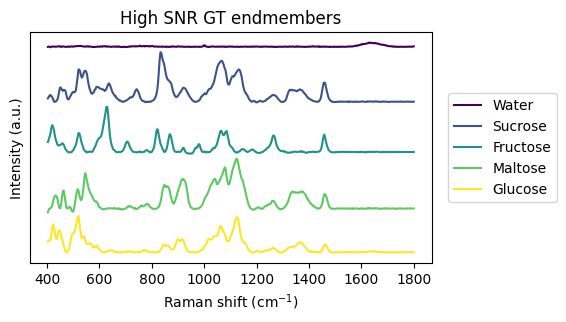

In [17]:
plt.figure(figsize=(7, 3))

order = [4, 0, 1, 2, 3]
endmember_names_sorted = [enmember_names[i] for i in order]
hsnr_gt_endmembers_preprocessing_sorted = [hsnr_gt_endmembers_preprocessing[i] for i in order]

rp.plot.spectra(hsnr_gt_endmembers_preprocessing_sorted, spectral_axis_cropped, label=endmember_names_sorted, title='High SNR GT endmembers', plot_type='single stacked',)

plt.savefig('high_snr_gt_endmembers_preprocessing_stacked.png', dpi=1200, bbox_inches='tight')

Plot endmembers before and after preprocessing

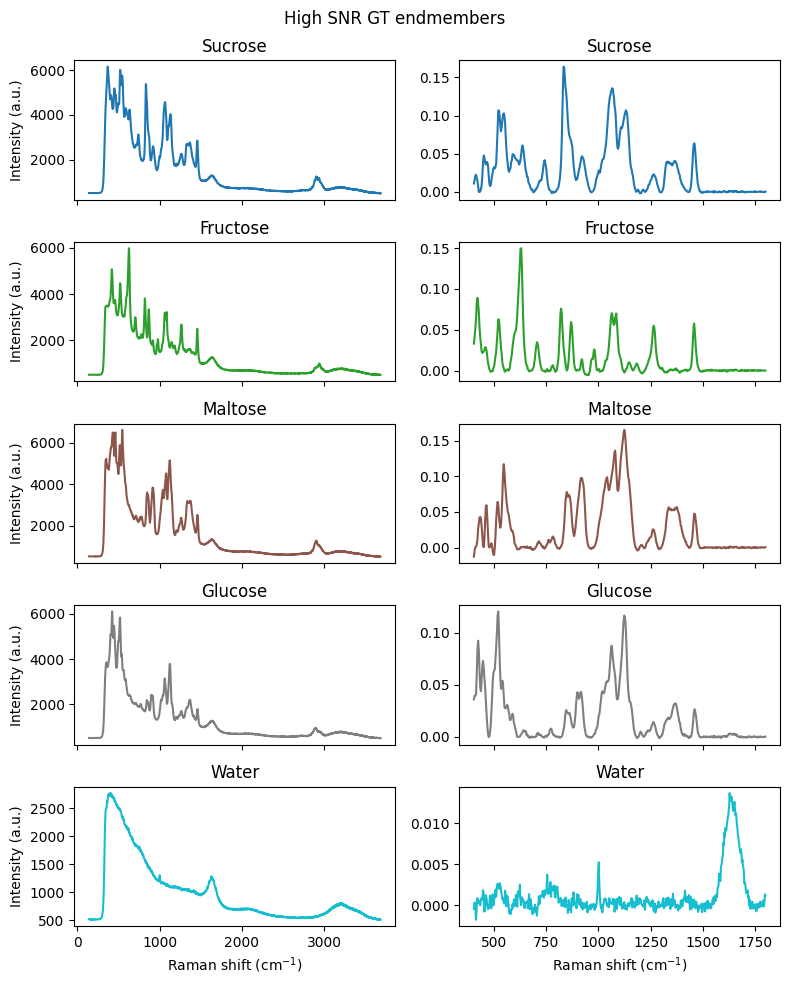

In [18]:
plot_endmembers(list(hsnr_gt_endmembers), list(hsnr_gt_endmembers_preprocessing), spectral_axis, spectral_axis_cropped, 'High SNR GT endmembers', save_path='high_snr_gt_endmembers.png')

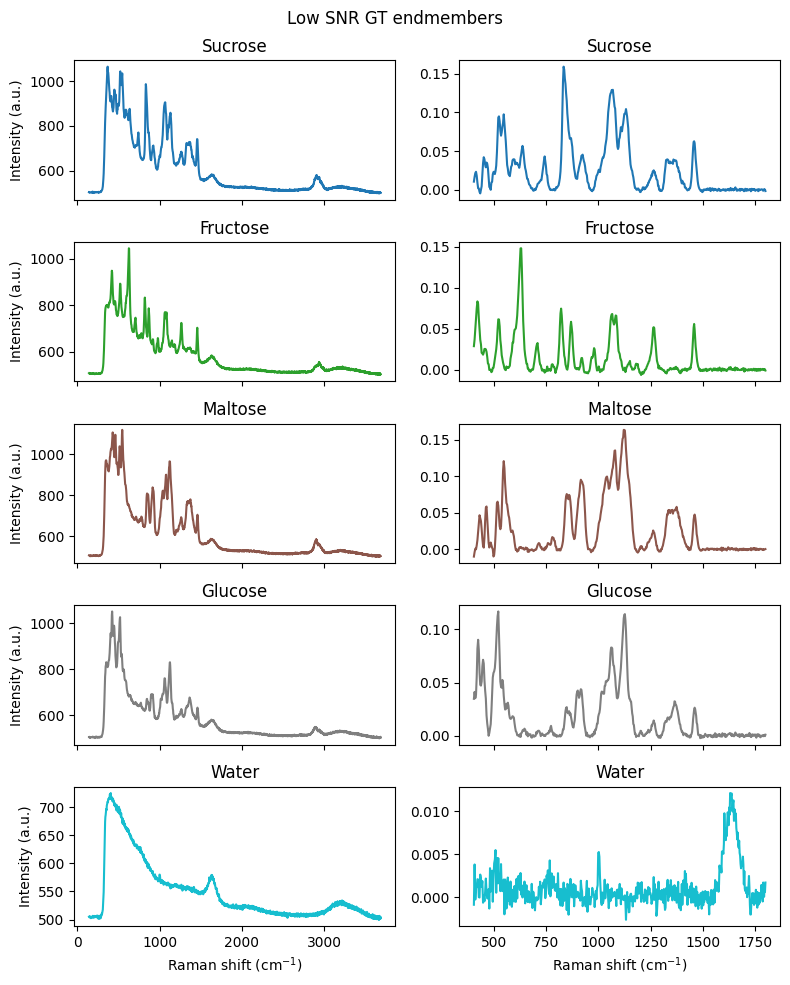

In [19]:
plot_endmembers(list(lsnr_gt_endmembers), list(lsnr_gt_endmembers_preprocessing), spectral_axis, spectral_axis_cropped,
                'Low SNR GT endmembers', save_path='low_snr_gt_endmembers.png')